In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\Datasets\train_AV.csv')

In [5]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [6]:
test = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\Datasets\test_AV.csv')

In [7]:
test.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States
1,32563,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States
2,32564,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States
3,32565,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States
4,32566,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,30,United-States


In [8]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [9]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [10]:
#step1: Get a list of categorical variables:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
print(categorical_variables)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [11]:
#Step2: use the apply function in python to determine the number of unique values in each column
train[categorical_variables].apply(lambda x: len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [12]:
#print the counts of each category
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [13]:
#print the percentage of observations in each category
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [14]:
#print the counts of each category
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [15]:
#print the percentage of observations in each category
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [16]:
#print the cross-tabulation
ct = pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


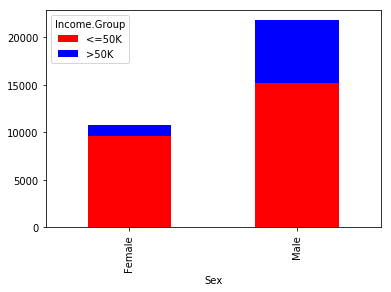

In [17]:
#we can also plot it using a stacked chart
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

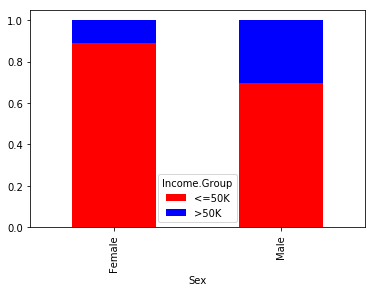

In [18]:
def percConvert(ser):
    return ser/float(ser[-1])
ct2 = ct.apply(percConvert, axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

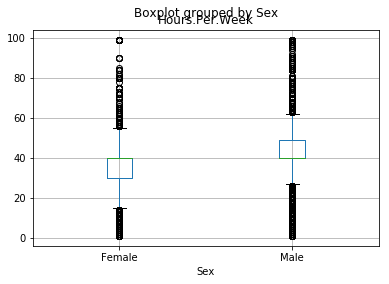

In [19]:
train.boxplot(column='Hours.Per.Week',by='Sex')
#box plot 

In [20]:
train.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [21]:
test.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

In [22]:
from scipy.stats import mode

mode(train['Workclass']).mode[0]

C:\Users\vinee\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Private'

In [23]:
var_to_impute = ['Workclass','Occupation','Native.Country']
for var in var_to_impute:
    train[var].fillna(mode(train[var]).mode[0], inplace=True)
    test[var].fillna(mode(train[var]).mode[0], inplace=True)

C:\Users\vinee\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [24]:
train.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [25]:
test.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

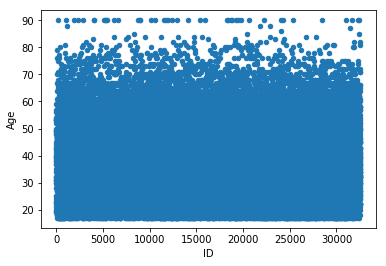

In [26]:
#making a scatter plot for age
%matplotlib inline
train.plot('ID', 'Age', kind='scatter')

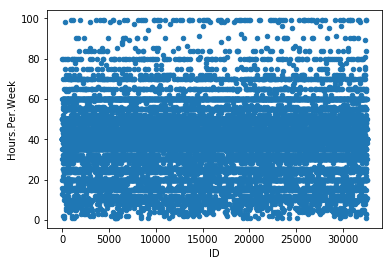

In [27]:
#making a scatter plot for hours-per-week
train.plot('ID','Hours.Per.Week', kind = 'scatter')

In [28]:
#determine the percentage of observations in each category
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [29]:
categories_to_combine = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']

In [30]:
#Run a loop and replace all values with others
for cat in categories_to_combine:
        train['Workclass'].replace({cat:'others'},inplace=True)
        test['Workclass'].replace({cat:'others'},inplace=True)

In [31]:
#check the new categories in train
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

In [32]:
#check the new categories in test
test['Workclass'].value_counts()/train.shape[0]

Private             0.373852
others              0.053561
Self-emp-not-inc    0.040570
Local-gov           0.032032
Name: Workclass, dtype: float64

In [33]:
#make list of categorical variables
categorical_variables = list(train.dtypes.loc[train.dtypes=='object'].index)
categorical_variables

['Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [34]:
#remove workplace beacuse already removed
categorical_variables = categorical_variables[1:]
categorical_variables

['Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [35]:
#check the current number of unique values
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [36]:
for column in categorical_variables:
    #determine the categories to combine
    freq = train[column].value_counts()/train.shape[0]
    categories_to_combine = list(freq[freq.values<0.05].index)
    #print(categories_to_combine)
    #loop over all categories and combine them as others
for cat in categories_to_combine:
    train[column].replace({cat:'Others'}, inplace=True)
    test[column].replace({cat:'Others'}, inplace=True)

In [37]:
#check the result for train data
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [38]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,others,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [41]:
#Now we convert them using labelencoder
le = LabelEncoder()
for var in categorical_variables:
    train[var] = le.fit_transform(train[var])

In [42]:
train.dtypes

ID                int64
Age               int64
Workclass         int32
Education         int32
Marital.Status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Hours.Per.Week    int64
Native.Country    int32
Income.Group      int32
dtype: object

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
#define the predictors which will be all variables except id and target
dependent_variable = 'Income.Group'
independent_variable = [x for x in train.columns if x not in ['ID', dependent_variable]]
print(independent_variable)

['Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country']


In [45]:
model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=100,max_features='sqrt')

model.fit(train[independent_variable],train[dependent_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
predictions_train = model.predict(train[independent_variable])

In [47]:
predictions_train

array([0, 1, 0, ..., 0, 0, 0])

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
acc_train = accuracy_score(train[dependent_variable],predictions_train)

In [50]:
acc_train
#since the accuracy is greater than 60% the variables which we have considered to predict the income are correct

0.8165903995577531